# <font color='Mahogany'> DATA INCUBATOR </font>

## libraries & styles

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os  
import pandas as pd
import numpy as np  
import csv as csv
import openpyxl
import datetime
from pandas import ExcelWriter
import matplotlib.pyplot as plt
from matplotlib.text import TextPath
import pylab as pl
from pandas.plotting import register_matplotlib_converters
from itertools import permutations
register_matplotlib_converters()
import statistics as stat

In [27]:
# Figure style

font_axis =  {'fontname':'Times New Roman', 'size':'14', 'weight':'bold'}  
font_title = {'fontname':'Times New Roman', 'size':'16', 'color':'purple', 'weight':'bold', 'verticalalignment':'bottom'}

xlabel_DT  = "plt.xlabel('DateTime', font_axis)"
ylabel_NC  = "plt.ylabel('New Cases', font_axis)"

xscale    = "plt.xticks(np.arange(18, 40, step=2))"
yscale_1  = "plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))"
yscale_2  = "plt.yscale('log')"  

legend_ul = "plt.legend(loc='upper left', fontsize = '10')"
legend_ur = "plt.legend(loc='upper right', fontsize = '10')"
legend_o  = "plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '10')"

grid      = "plt.grid(color='grey', linestyle=':', linewidth=1)"
fig_txt   = "plt.text(text_x, text_y, text , bbox={'facecolor':'red', 'alpha':0.15, 'pad':8}, fontsize=10, style='italic', fontweight='bold')"

## COVID - SEC1

In [21]:
os.chdir(r"C:\Users\mahta\OneDrive - TRIUMF\Vera_Test_Analysis")

try:
    df = pd.read_excel('ZDI-covid-data.xlsx', sheet_name='covid-data', header=0)

except:
    print('Input file does not exist or something else went wrong')
    
df['date'] = df['date'].apply(pd.to_datetime)
df.set_index(keys='date', inplace=True, drop=False)
print('\ndf head is:\n', df.head(5))  
df.info()


df head is:
            iso_code continent     location       date  total_cases  new_cases  \
date                                                                            
2020-02-24      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
2020-02-25      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2020-02-26      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
2020-02-27      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
2020-02-28      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-02-24                 NaN           NaN         NaN                  NaN   
2020-02-25                 NaN           NaN         NaN                  NaN   
2020-02-26                 NaN           NaN         NaN                  NaN   
2020-02-27   


Showing data between:  2021-07-01 00:00:00  to  2021-09-12 00:00:00 , duration =  73 days, 0:00:00


Text(0.5, 0, 'Date')

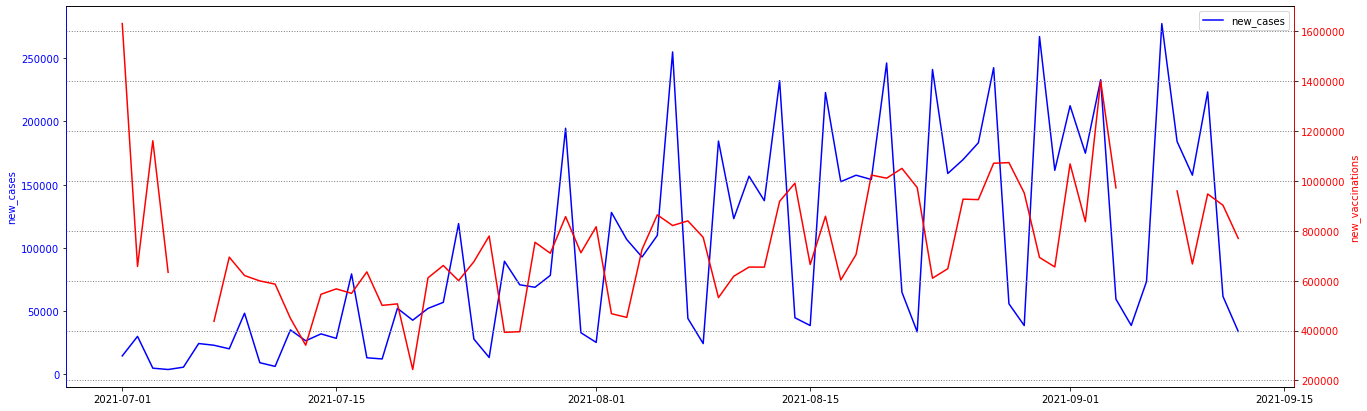

In [44]:
US = df[(df['location']=='United States')] 
#print('\nUS head is:\n', US.head(5))    

start = datetime.datetime(2021,7,1)
end   = datetime.datetime(2021,9,12)
print('\nShowing data between: ',start, ' to ', end, ', duration = ', end-start)

US_time = US[(US['date']>= start) & (US['date']<= end)] 
#print('\nUS_time head is:\n', US_time.head(5))   

fig, ax1 = plt.subplots(figsize=(22,7)) 
ax2=ax1.twinx()


ax1.plot(US_time.new_cases, color='b', label='new_cases')
ax1.set_ylabel('new_cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend()

ax2.plot(US_time.new_vaccinations, color='r', label='new_vaccinations')
ax2.set_ylabel('new_vaccinations', color='r')
ax2.tick_params(axis='y', labelcolor='r')


#plt.plot(US_time.new_cases,        label='new_cases')
#plt.plot(US_time.new_vaccinations, label='new_vaccinations')

#plt.title('Daily New cases in US' , font_title)
#exec(xlabel_DT); exec(ylabel_NC); exec(legend_ur); 
exec(grid)

ax2.spines['left'].set_color('b')
ax2.spines['right'].set_color('r')
ax2.set_xlabel('Date', color='k')




## WIFI - SEC2

In [53]:
os.chdir(r"C:\Users\mahta\OneDrive - TRIUMF\Vera_Test_Analysis")

try:
    df = pd.read_excel('ZDI-NYC_Wi-Fi_Hotspot_Locations.xlsx', sheet_name='NYC_Wi-Fi_Hotspot_Locations', header=0)
      
except:
    print('Input file does not exist or something else went wrong')
    
print('\n df head is:'); print(df.head(5))   
print ('\nThe number of IDs:' , df.shape)

Input file does not exist or something else went wrong

 df head is:
   OBJECTID  Borough          Type           Provider                    Name  \
0     10604        4  Limited Free           SPECTRUM       Baisley Pond Park   
1     10555        4  Limited Free           SPECTRUM            Kissena Park   
2     12370        3          Free   Transit Wireless            Grand St (L)   
3      9893        3          Free  Downtown Brooklyn                     NaN   
4     10169        1          Free   Transit Wireless  Lexington Av-63 St (F)   

                 Location   Latitude  Longitude             X            Y  \
0          Park Perimeter  40.674860 -73.784120  1.044132e+06  185219.8921   
1          Park Perimeter  40.747560 -73.818150  1.034638e+06  211685.2178   
2            Grand St (L)  40.711926 -73.940670  1.000698e+06  198655.9088   
3           125 Court St.  40.689985 -73.991995  9.864700e+05  190656.6804   
4  Lexington Av-63 St (F)  40.764630 -73.966115  9.936

In [37]:
unique = df['Provider'].unique()
print ('Providers are:\n',unique)
print ('\n The number of unique provider are:' , unique.size)

park = df.loc[df['Name'].str.contains('Park|park') == True]
#print('\n df with park:\n\n', park)
unique_park = park['Name'].unique()
print ('\n The number of unique parks are:' , unique_park.size)

Providers are:
 ['SPECTRUM' 'Transit Wireless' 'Downtown Brooklyn' 'Harlem' 'BPL'
 'ALTICEUSA' 'Fiberless' 'LinkNYC - Citybridge' 'Manhattan Down Alliance'
 'AT&T' 'NYPL' 'NYCHA' 'Chelsea' 'QPL' 'City Tech' 'Spot On Networks'
 'Partner']

 The number of unique provider are: 17

 The number of unique parks are: 107


In [51]:
bronx = df[(df['City']=='Bronx')] 
#print('\n df with Bronx:\n\n', bronx)
print ('\nThe number IDs in bronx:' , bronx.shape)

brx_provider = bronx['Provider'].unique()
#unique_park = park['Name'].unique()

print ('\nProviders in Bronx:' , brx_provider)
print()
print('ALTICEUSA',            bronx['Provider'].str.contains('ALTICEUSA').value_counts()[True])
print('LinkNYC - Citybridge', bronx['Provider'].str.contains('LinkNYC - Citybridge').value_counts()[True])
print('NYPL',                 bronx['Provider'].str.contains('NYPL').value_counts()[True])
print('Transit Wireless',     bronx['Provider'].str.contains('Transit Wireless').value_counts()[True])
print('AT&T',                 bronx['Provider'].str.contains('AT&T').value_counts()[True])

ALTICEUSA = df[(df['Provider']=='ALTICEUSA')] 
print ('\nAll IDs with ALTICEUSA provider:' , ALTICEUSA.shape)


The number IDs in bronx: (316, 29)

Providers in Bronx: ['ALTICEUSA' 'LinkNYC - Citybridge' 'NYPL' 'Transit Wireless' 'AT&T']

ALTICEUSA 120
LinkNYC - Citybridge 137
NYPL 35
Transit Wireless 21
AT&T 3

All IDs with ALTICEUSA provider: (237, 29)


In [54]:
free = df[(df['Type']=='Free') & (df['Location_T']!='Library')] 
print ('\nThe number of free wifi:' , free.shape)


The number of free wifi: (2522, 29)


In [73]:
#df.info()
df['Date'] = pd.to_datetime(df['Activated'], errors='coerce')
Activated = df[pd.notnull(df['Date'])]
print ('\nSize after dropping nat dates:' , Activated.shape)

Activated['weekday'] = Activated['Date'].dt.dayofweek
print('\nActivated head is:\n\n',Activated.head(5))

print('\nActivation date frequency')
print ('Monday:'  , (Activated['weekday']==0).sum() )
print ('Tuesday:' , (Activated['weekday']==1).sum() )
print ('Wednsday:', (Activated['weekday']==2).sum() )
print ('Thursday:', (Activated['weekday']==3).sum() )
print ('Friday:'  , (Activated['weekday']==4).sum() )
print ('Saturday:', (Activated['weekday']==5).sum() )
print ('Sunday:'  , (Activated['weekday']==6).sum() )

print('Activation on Wednsday:', )
#Monday=0, Sunday=6


Size after dropping nat dates: (1822, 30)

Activated head is:

     OBJECTID  Borough  Type              Provider          Name  \
13     12084        3  Free  LinkNYC - Citybridge  bk-02-126166   
14     12080        3  Free  LinkNYC - Citybridge  bk-02-126505   
15     12500        5  Free  LinkNYC - Citybridge  si-02-125476   
17     10191        4  Free  LinkNYC - Citybridge  qu-01-145954   
19     11491        1  Free  LinkNYC - Citybridge  mn-03-123802   

                    Location   Latitude  Longitude             X            Y  \
13          181 Court Street  40.687901 -73.993147  9.861506e+05  189897.3184   
14       620 ATLANTIC AVENUE  40.683625 -73.977006  9.906274e+05  188340.2828   
15         19 SEAVIEW AVENUE  40.590983 -74.100732  9.562733e+05  154603.5435   
17  43-40 NORTHERN BOULEVARD  40.753641 -73.918402  1.006857e+06  213858.8191   
19              237 1 AVENUE  40.731219 -73.982827  9.890095e+05  205679.8535   

    ... Postcode BoroCD Census Tract BCTCB201

c:\users\mahta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## LASER - SEC 3

In [8]:
config = list(permutations([0,1,1,3,4]))
print ('\n All possibble configurations of buldings arangment with one empty node:\n', config)

for i in range (0,len(config)):
    config[i]= (0,) + config[i]
print('\n All configurations after adding node 0:\n', config)  

n_config = len(config)
n_node   = len(config[i])

print('\n Total number of configurations is:', n_config)
print(' Total number of nodes in a typical configurations is:', n_node) 


 All possibble configurations of buldings arangment with one empty node:
 [(0, 1, 1, 3, 4), (0, 1, 1, 4, 3), (0, 1, 3, 1, 4), (0, 1, 3, 4, 1), (0, 1, 4, 1, 3), (0, 1, 4, 3, 1), (0, 1, 1, 3, 4), (0, 1, 1, 4, 3), (0, 1, 3, 1, 4), (0, 1, 3, 4, 1), (0, 1, 4, 1, 3), (0, 1, 4, 3, 1), (0, 3, 1, 1, 4), (0, 3, 1, 4, 1), (0, 3, 1, 1, 4), (0, 3, 1, 4, 1), (0, 3, 4, 1, 1), (0, 3, 4, 1, 1), (0, 4, 1, 1, 3), (0, 4, 1, 3, 1), (0, 4, 1, 1, 3), (0, 4, 1, 3, 1), (0, 4, 3, 1, 1), (0, 4, 3, 1, 1), (1, 0, 1, 3, 4), (1, 0, 1, 4, 3), (1, 0, 3, 1, 4), (1, 0, 3, 4, 1), (1, 0, 4, 1, 3), (1, 0, 4, 3, 1), (1, 1, 0, 3, 4), (1, 1, 0, 4, 3), (1, 1, 3, 0, 4), (1, 1, 3, 4, 0), (1, 1, 4, 0, 3), (1, 1, 4, 3, 0), (1, 3, 0, 1, 4), (1, 3, 0, 4, 1), (1, 3, 1, 0, 4), (1, 3, 1, 4, 0), (1, 3, 4, 0, 1), (1, 3, 4, 1, 0), (1, 4, 0, 1, 3), (1, 4, 0, 3, 1), (1, 4, 1, 0, 3), (1, 4, 1, 3, 0), (1, 4, 3, 0, 1), (1, 4, 3, 1, 0), (1, 0, 1, 3, 4), (1, 0, 1, 4, 3), (1, 0, 3, 1, 4), (1, 0, 3, 4, 1), (1, 0, 4, 1, 3), (1, 0, 4, 3, 1), (1, 1,

### buildings of heights 1, 1, 3, and 4

In [9]:
print(list(reversed(range(0,6))))
print(list(reversed(range(0,n_node))))

[5, 4, 3, 2, 1, 0]
[5, 4, 3, 2, 1, 0]


In [11]:
sum_array=[]
for c in range (0,n_config):
    print('\n---------------')
    print('configuration:',config[c])
    
    total_sum=0
    for n in list(reversed(range(0,n_node))): 
        build_height=config[c][n]
        #print('\n target building node=',n)
        print('\ntarget building height=', build_height)
        
        building_sum=0
        #print('init sum=',building_sum)
        print('iteration on other buildings height to the left:')
        
        iter= list(reversed(range(0,n)))
        #print('iter array is (nn):',iter)
        for nn in iter:
            #print('\n iter building node=',nn)
            node_height=config[c][nn]
            print('iter height:',node_height)
            
            if node_height<=build_height:
                building_sum=building_sum+1
            
            else:
                building_sum=building_sum+1
                break
                            
        total_sum = total_sum + building_sum
        print('target building distance=',building_sum)
    
    print('\n--> sum of distances',total_sum)
    sum_array.append(total_sum)
print('\n sum of distances array:',sum_array)    

sum_lenght = len(sum_array)
sum_mean   = stat.mean(sum_array)
sum_std    = stat.pstdev(sum_array)

#to check
print('\ntotal number of configurations is:', n_config)
print('lenght of sum array', sum_lenght)
print('mean of sum of distances', sum_mean)
print('standard deviation of sum of distances', sum_std)


---------------
configuration: (0, 0, 1, 1, 3, 4)

target building height= 4
iteration on other buildings height to the left:
iter height: 3
iter height: 1
iter height: 1
iter height: 0
iter height: 0
target building distance= 5

target building height= 3
iteration on other buildings height to the left:
iter height: 1
iter height: 1
iter height: 0
iter height: 0
target building distance= 4

target building height= 1
iteration on other buildings height to the left:
iter height: 1
iter height: 0
iter height: 0
target building distance= 3

target building height= 1
iteration on other buildings height to the left:
iter height: 0
iter height: 0
target building distance= 2

target building height= 0
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 15

---------------
configuration: (0, 0, 1, 1, 4, 3)

target building height=

iter height: 0
iter height: 0
target building distance= 2

target building height= 0
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 9

---------------
configuration: (0, 0, 3, 4, 1, 1)

target building height= 1
iteration on other buildings height to the left:
iter height: 1
iter height: 4
target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 4
target building distance= 1

target building height= 4
iteration on other buildings height to the left:
iter height: 3
iter height: 0
iter height: 0
target building distance= 3

target building height= 3
iteration on other buildings height to the left:
iter height: 0
iter height: 0
target building distance= 2

target building height= 0
iteration on other buildings height to the left:
iter height: 0
target building d

target building height= 1
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 13

---------------
configuration: (0, 1, 1, 0, 4, 3)

target building height= 3
iteration on other buildings height to the left:
iter height: 4
target building distance= 1

target building height= 4
iteration on other buildings height to the left:
iter height: 0
iter height: 1
iter height: 1
iter height: 0
target building distance= 4

target building height= 0
iteration on other buildings height to the left:
iter height: 1
target building distance= 1

target building height= 1
iteration on other buildings height to the left:
iter height: 1
iter height: 0
target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other b

iter height: 0
target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 9

---------------
configuration: (0, 1, 4, 0, 3, 1)

target building height= 1
iteration on other buildings height to the left:
iter height: 3
target building distance= 1

target building height= 3
iteration on other buildings height to the left:
iter height: 0
iter height: 4
target building distance= 2

target building height= 0
iteration on other buildings height to the left:
iter height: 4
target building distance= 1

target building height= 4
iteration on other buildings height to the left:
iter height: 1
iter height: 0
target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iterati

target building height= 1
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 7

---------------
configuration: (0, 1, 1, 0, 3, 4)

target building height= 4
iteration on other buildings height to the left:
iter height: 3
iter height: 0
iter height: 1
iter height: 1
iter height: 0
target building distance= 5

target building height= 3
iteration on other buildings height to the left:
iter height: 0
iter height: 1
iter height: 1
iter height: 0
target building distance= 4

target building height= 0
iteration on other buildings height to the left:
iter height: 1
target building distance= 1

target building height= 1
iteration on other buildings height to the left:
iter height: 1
iter height: 0
target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 0
target building 

target building height= 1
iteration on other buildings height to the left:
iter height: 4
target building distance= 1

target building height= 4
iteration on other buildings height to the left:
iter height: 1
iter height: 0
target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 7

---------------
configuration: (0, 1, 4, 3, 0, 1)

target building height= 1
iteration on other buildings height to the left:
iter height: 0
iter height: 3
target building distance= 2

target building height= 0
iteration on other buildings height to the left:
iter height: 3
target building distance= 1

target building height= 3
iteration on other buildings height to the left:
iter height: 4
target building distance= 1

target building height= 4
iteration on other buildings height to the left:
it

target building height= 3
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 8

---------------
configuration: (0, 3, 1, 1, 0, 4)

target building height= 4
iteration on other buildings height to the left:
iter height: 0
iter height: 1
iter height: 1
iter height: 3
iter height: 0
target building distance= 5

target building height= 0
iteration on other buildings height to the left:
iter height: 1
target building distance= 1

target building height= 1
iteration on other buildings height to the left:
iter height: 1
iter height: 3
target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 3
target building distance= 1

target building height= 3
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iterat

configuration: (0, 3, 4, 1, 1, 0)

target building height= 0
iteration on other buildings height to the left:
iter height: 1
target building distance= 1

target building height= 1
iteration on other buildings height to the left:
iter height: 1
iter height: 4
target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 4
target building distance= 1

target building height= 4
iteration on other buildings height to the left:
iter height: 3
iter height: 0
target building distance= 2

target building height= 3
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 7

---------------
configuration: (0, 4, 0, 1, 1, 3)

target building height= 3
iteration on other buildings height to the left:
iter height: 1
iter height: 1
iter height: 0
iter height: 4
target building distance= 

iter height: 0
iter height: 1
iter height: 4
target building distance= 3

target building height= 0
iteration on other buildings height to the left:
iter height: 1
target building distance= 1

target building height= 1
iteration on other buildings height to the left:
iter height: 4
target building distance= 1

target building height= 4
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 10

---------------
configuration: (0, 4, 1, 0, 3, 1)

target building height= 1
iteration on other buildings height to the left:
iter height: 3
target building distance= 1

target building height= 3
iteration on other buildings height to the left:
iter height: 0
iter height: 1
iter height: 4
target building distance= 3

target building height= 0
iteration on other buildings height to the left:
iter height: 1
target building distance= 1

ta

target building distance= 2

target building height= 1
iteration on other buildings height to the left:
iter height: 3
target building distance= 1

target building height= 3
iteration on other buildings height to the left:
iter height: 4
target building distance= 1

target building height= 4
iteration on other buildings height to the left:
iter height: 0
target building distance= 1

target building height= 0
iteration on other buildings height to the left:
target building distance= 0

--> sum of distances 6

 sum of distances array: [15, 11, 12, 11, 9, 8, 15, 11, 12, 11, 9, 8, 11, 9, 11, 9, 9, 9, 9, 7, 9, 7, 7, 7, 14, 10, 11, 10, 8, 7, 13, 9, 12, 11, 9, 8, 11, 9, 10, 9, 9, 8, 9, 7, 8, 7, 7, 6, 14, 10, 11, 10, 8, 7, 13, 9, 12, 11, 9, 8, 11, 9, 10, 9, 9, 8, 9, 7, 8, 7, 7, 6, 12, 9, 12, 9, 8, 8, 11, 8, 10, 9, 8, 7, 11, 8, 10, 9, 8, 7, 9, 9, 8, 7, 8, 7, 11, 8, 11, 8, 7, 7, 10, 7, 9, 8, 7, 6, 10, 7, 9, 8, 7, 6, 8, 8, 7, 6, 7, 6]

total number of configurations is: 120
lenght of sum array 12

### buildings of heights 1, 2, ..., 10

In [6]:
config = list(permutations(range(0, 11)))

for i in range (0,len(config)):
    config[i]= (0,) + config[i]
    
n_config = len(config)
n_node   = len(config[i])

print('\n Total number of configurations is:', n_config)
print(' Total number of nodes in a typical configurations is:', n_node)  


 Total number of configurations is: 39916800
 Total number of nodes in a typical configurations is: 12


In [7]:
sum_array=[]
for c in range (0,n_config):
        
    total_sum=0
    for n in list(reversed(range(0,n_node))):
        build_height=config[c][n]
                
        building_sum=0
                
        iter= list(reversed(range(0,n)))
        for nn in iter:
            node_height=config[c][nn]
                        
            if node_height<=build_height:
                building_sum=building_sum+1
            
            else:
                building_sum=building_sum+1
                break
                            
        total_sum = total_sum + building_sum
            
    sum_array.append(total_sum)
    
sum_lenght = len(sum_array)
sum_mean   = stat.mean(sum_array)
sum_std    = stat.pstdev(sum_array)

#to check
print('\ntotal number of configurations is:', n_config)
print('lenght of sum array', sum_lenght)
print('mean of sum of distances', sum_mean)
print('standard deviation of sum of distances', sum_std)


total number of configurations is: 39916800
lenght of sum array 39916800
mean of sum of distances 25.23852813852814
mean of sum of distances 5.040321014465438


### buildings of heights 1, 2, ..., 20

In [12]:
config = list(permutations(range(0, 21)))

for i in range (0,len(config)):
    config[i]= (0,) + config[i]
    
n_config = len(config)
n_node   = len(config[i])

print('\n Total number of configurations is:', n_config)
print(' Total number of nodes in a typical configurations is:', n_node)  

MemoryError: 

In [ ]:
sum_array=[]
for c in range (0,n_config):
        
    total_sum=0
    for n in list(reversed(range(0,n_node))):
        build_height=config[c][n]
                
        building_sum=0
                
        iter= list(reversed(range(0,n)))
        for nn in iter:
            node_height=config[c][nn]
                        
            if node_height<=build_height:
                building_sum=building_sum+1
            
            else:
                building_sum=building_sum+1
                break
                            
        total_sum = total_sum + building_sum
            
    sum_array.append(total_sum)
    
sum_lenght = len(sum_array)
sum_mean   = stat.mean(sum_array)
sum_std    = stat.pstdev(sum_array)

#to check
print('\ntotal number of configurations is:', n_config)
print('lenght of sum array', sum_lenght)
print('mean of sum of distances', sum_mean)
print('Standard deviation of sum of distances', sum_std)